## Spam Detection with Natural Language Processing (NLP)

In this notebook I am not focusing on exploratory data analysis (EDA), it is about basic of NLP

### Step 1: Importing Libraries
We will be using different libraries such as: pandas, numpy. in every part I will add the related libraries for you to see more cleare for example for data cleaning which libraries do you need.We will use re, stopwords and other library to clean the data

In [1]:
import pandas as pd
import numpy as np


### Step 2: Reading the dataset and preparing it for basic processing in NLP
First, we read the csv using pandas and then modify the column names for easy references. In this dataset, the target variable is categorical (ham, spam) and we need to convert into a binary variable. 

We replace ham with 0 (meaning not a spam) and spam with 1 (meaning that the SMS is a spam)

we downloded the dataset from UCI machine learning Repository https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [2]:
dataset = pd.read_csv("SMSSpamCollection", sep='\t', names=['label','comment'])
dataset.describe()


,label,comment
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [3]:
dataset.shape

(5572, 2)

In [4]:
dataset.isnull().sum()

label      0
comment    0
dtype: int64

In [5]:
dataset.nunique()

label         2
comment    5169
dtype: int64

### Step 3: Data Cleaning and Preprocessing

In [6]:
import nltk
import re
# if you dont have stopwords you can download it by nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []
# in block for we remoce all the characters expect a-z and A-Z
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['comment'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

#### Creating bag of words model

In [7]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
# Dealing with Categorize Variable
y= pd.get_dummies(dataset['label'])
y= y.iloc[:,1]
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: uint8

In [9]:
# Split features to train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state =0)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 2500)
(1115, 2500)
(4457,)
(1115,)


### Create model

in this project I used Naive bayes classification model because this model works very well with NLP and it is based on probabilities . 

In [15]:
from sklearn.naive_bayes import MultinomialNB
spam_detection = MultinomialNB().fit(X_train,y_train)


In [16]:
y_pred = spam_detection.predict(X_test)

#### to compare y_pred and y_test we used confusion_matrix

[[945  10]
 [  8 152]]


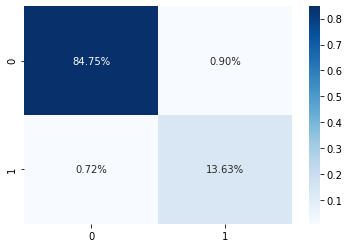

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

this chart shows 84.75% + 13.63% or 946+ 152 predict corectly 

In [23]:
# check the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of model is : " , accuracy)

The accuracy of model is :  0.9838565022421525
